# <font color = 'blue'>M3.2 - Regression Basics</font>

In [1]:
import os
import numpy as np
import pandas as pd
np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
from scipy import stats

from sklearn import datasets


pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")

PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)
        
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from pprint import pprint

#This is a little recursive helper function converts all nested ndarrays to python list of lists so that pretty printer knows what to do.

def arrayToList(arr):
    if type(arr) == type(np.array):
        #If the passed type is an ndarray then convert it to a list and
        #recursively convert all nested types
        return arrayToList(arr.tolist())
    else:
        #if item isn't an ndarray leave it as is.
        return arr

# suppress exponential notation, define an appropriate float formatter
# specify stdout line width and let pretty print do the work
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:16.5f}'.format}, linewidth=120)

### SLR - OLS

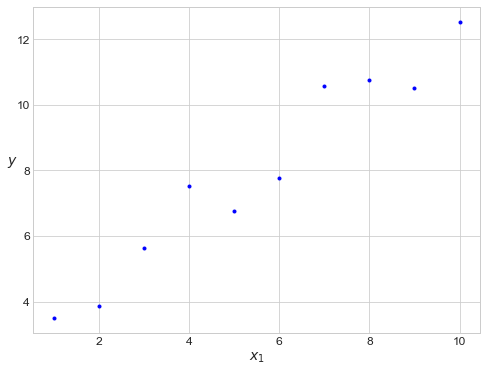

In [2]:
x = np.linspace(1, 10, 10)
y = 2 + x + np.random.randn(10)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
# plt.axis([0, 2, 0, 15])

plt.show()

In [3]:
x = sm.add_constant(x)
linear_regression = sm.OLS(y,x)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     138.5
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           2.49e-06
Time:                        21:37:20   Log-Likelihood:                -10.415
No. Observations:                  10   AIC:                             24.83
Df Residuals:                       8   BIC:                             25.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4860      0.524      4.747      0.001       1.278       3.694
x1             0.9931      0.084     11.767      0.000       0.798       1.188
==============================================================================
Omnibus:                        0.936   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                0.719
Skew:                           0.361   Prob(JB):                        0.698
Kurtosis:                       1.903   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
betas = np.array(fitted_model.params)
y_pred = fitted_model.predict(x)
print(fitted_model.params)

[2.48601316 0.99309963]


In [5]:
absError = y_pred - y

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 0.6856195157635225
R-squared: 0.9453822032109368


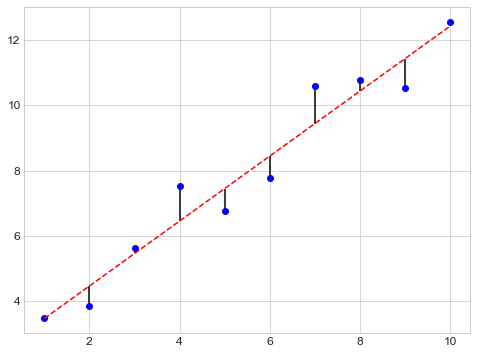

In [6]:
fig, ax = plt.subplots(figsize = (8, 6))
x = np.linspace(1, 10, 10)

ax.plot(x, y,  "b.", markersize = 12)
ax.plot(x, y_pred, "r--")
ax.vlines(x,y,y_pred)

plt.show()

### SLR - NE

In [7]:
x = np.linspace(1, 10, 10)
y = 2 + x + np.random.randn(10)

print(x.shape)
print(y.shape)

(10,)
(10,)


In [8]:
x_b = np.c_[np.ones((10,)), x]
x_b

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [9]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([1.45636281, 0.95508708])

In [10]:
x_new = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
x_new_b = np.c_[np.ones((10, 1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([ 2.41144989,  3.36653698,  4.32162406,  5.27671114,  6.23179822,
        7.18688531,  8.14197239,  9.09705947, 10.05214655, 11.00723364])

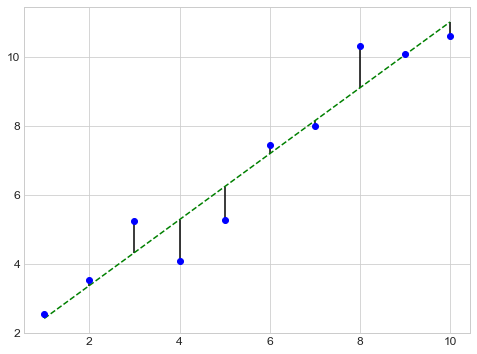

In [11]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.plot(x_new, y_predict, "g--")
plt.plot(x, y, "b.", markersize = 12)
ax.vlines(x,y,y_predict)

plt.show()

In [1]:
!pip freeze > requirements.txt